In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [54]:
df = pd.read_sql_query("""
SELECT primary_title, runtime_minutes, genres, averagerating, 
numvotes, ordering, category, job, characters, id, release_date, 
production_budget, domestic_gross, worldwide_gross, primary_name
FROM imdb_title_basics ba
JOIN imdb_title_ratings r ON ba.tconst = r.tconst
JOIN imdb_title_principals p ON p.tconst = ba.tconst
JOIN imdb_name_basics na ON na.nconst = p.nconst
LEFT JOIN movies.tn_movie_budgets bud ON bud.movie = ba.primary_title
""", con)

In [55]:
df.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,10,composer,,,NaN,None,None,None,None,Naushad
1,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,1,actor,,"[""Kundan S. Prasad"",""Bajrangi""]",NaN,None,None,None,None,Dilip Kumar
2,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,2,actress,,"[""Munni"",""Laila-E-Aasmaan""]",NaN,None,None,None,None,Vyjayanthimala
3,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,3,actor,,"[""Ganeshi N. Prasad""]",NaN,None,None,None,None,Balraj Sahni
4,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,4,actor,,"[""Dwarka N. Prasad""]",NaN,None,None,None,None,Sanjeev Kumar


In [56]:
def get_genres(df, genre):
    revenue_list = []
    profit_list = []
    for i in range(len(df)):
        if genre in df['genres3'].iloc[i]:
            revenue_list.append(df['worldwide_gross_2'].iloc[i])
            profit_list.append(df['profit_multiple'].iloc[i])
    avg_revenue = sum(revenue_list)/len(revenue_list)
    avg_profit = sum(profit_list)/len(profit_list)
    return avg_revenue, avg_profit
df['genres3'] = list(df['genres'].str.split(','))

In [57]:
df['release_date'] = pd.to_datetime(df['release_date'])
import datetime
df['year'], df['month'] = df['release_date'].apply(lambda x: x.year), df['release_date'].apply(lambda x: x.month)


In [58]:
df = df.explode('genres3')

In [59]:
df_econ = df.dropna(subset = ['production_budget', 'domestic_gross', 'worldwide_gross'])

In [60]:
df_econ['production_budget'] = df_econ['production_budget'].str.replace('$','').str.replace(',','')
df_econ['domestic_gross'] = df_econ['domestic_gross'].str.replace('$','').str.replace(',','')
df_econ['worldwide_gross'] = df_econ['worldwide_gross'].str.replace('$','').str.replace(',','')

C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [61]:
df_econ['production_budget'] = df_econ['production_budget'].astype(float)
df_econ['domestic_gross'] = df_econ['domestic_gross'].astype(float)
df_econ['worldwide_gross'] = df_econ['worldwide_gross'].astype(float)

C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [62]:
df_econ.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name,genres3,year,month
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,Action,2012.0,12.0
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,Animation,2012.0,12.0
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,Comedy,2012.0,12.0
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,Action,2012.0,12.0
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,Animation,2012.0,12.0


In [63]:
df_econ['profit_multiple'] = (df_econ.worldwide_gross - df_econ.production_budget) / df_econ.production_budget

C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_econ.head(20)

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name,genres3,year,month,profit_multiple
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,Action,2012.0,12.0,-0.998362
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,Animation,2012.0,12.0,-0.998362
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,Comedy,2012.0,12.0,-0.998362
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,Action,2012.0,12.0,-0.998362
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,Animation,2012.0,12.0,-0.998362
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,Comedy,2012.0,12.0,-0.998362
135,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,2,actress,,"[""Sweetcakes""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Haylie Duff,Action,2012.0,12.0,-0.998362
135,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,2,actress,,"[""Sweetcakes""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Haylie Duff,Animation,2012.0,12.0,-0.998362
135,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,2,actress,,"[""Sweetcakes""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Haylie Duff,Comedy,2012.0,12.0,-0.998362
136,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,3,actor,,"[""Dex Dogtective""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Charlie Sheen,Action,2012.0,12.0,-0.998362


In [70]:
df_econ = df_econ[df_econ.groupby('primary_name').primary_name.transform(len)>6]

In [146]:
df_writers = df_econ.loc[df_econ['category']== 'writer']
df_directors = df_econ.loc[df_econ['category']== 'director']
df_horror_writers = df_writers.loc[df_writers['genres3']== 'Horror']
df_horror_directors = df_directors.loc[df_directors['genres3']== 'Horror']

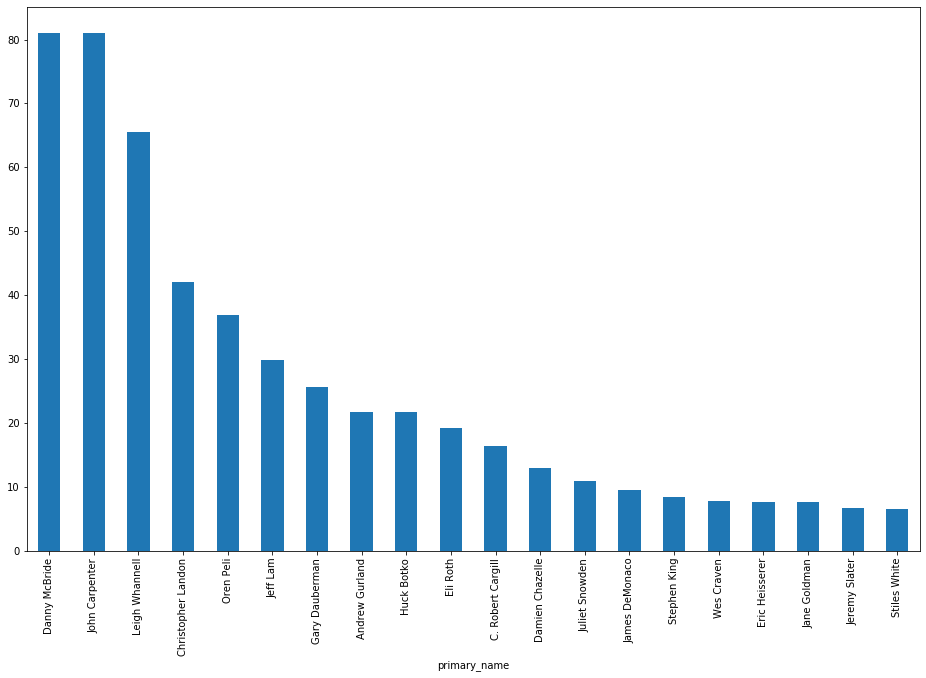

In [150]:
horror_writer_chart = df_horror_writers.groupby('primary_name')['profit_multiple'].mean().nlargest(20)
horror_writer_chart.plot.bar(figsize=(16,10))
plt.show()

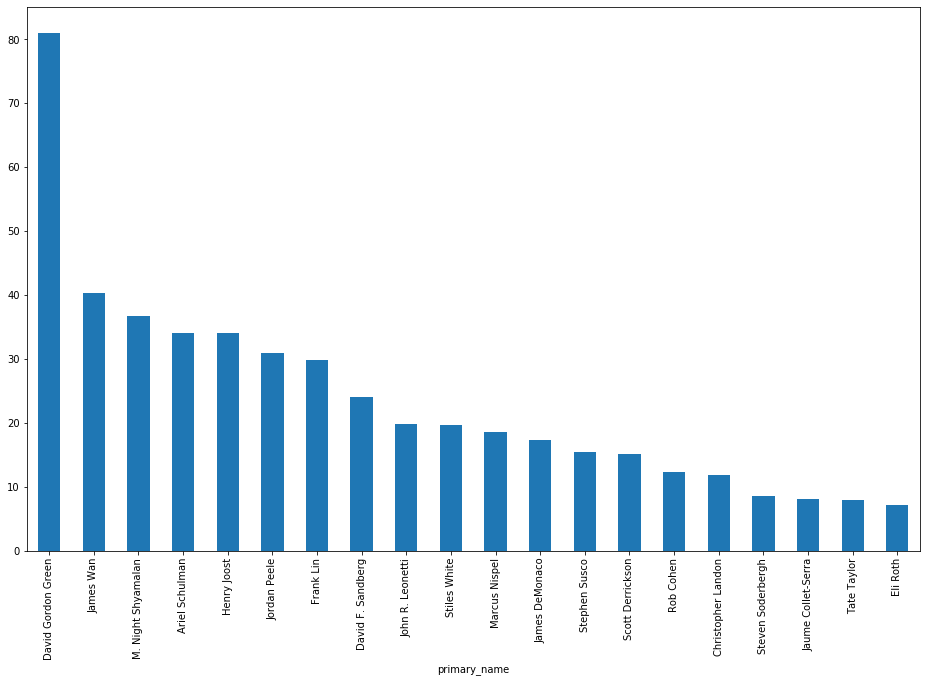

In [151]:
horror_director_chart = df_horror_directors.groupby('primary_name')['profit_multiple'].mean().nlargest(20)
horror_director_chart.plot.bar(figsize=(16,10))
plt.show()

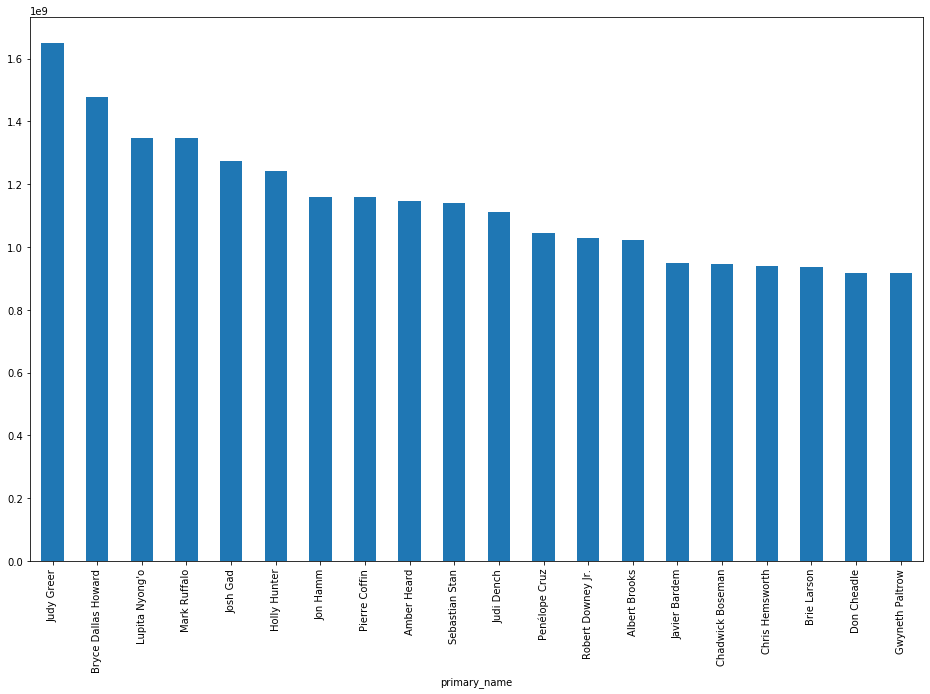

In [158]:
df_actors = df_econ.loc[(df_econ['category']== 'actor') | 
                        (df_econ['category']=='actress')]
df_adventure_actors = df_actors.loc[(df_actors['genres3']=='Adventure') | 
                                  (df_actors['genres3']=='Sci-Fi')]
adventure_actors_chart = df_adventure_actors.groupby('primary_name')['worldwide_gross'].mean().nlargest(20)
adventure_actors_chart.plot.bar(figsize=(16,10))
plt.show()

In [20]:
df_econ.groupby(['primary_name', 'category']).mean().sort_values(by='profit_multiple', ascending=False)

,,runtime_minutes,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,year,month,profit_multiple
primary_name,category,,,,,,,,,,,
Guymon Casady,producer,101.0,5.900000,65032.666667,8.0,71.666667,2.003333e+07,3.468903e+07,7.010693e+07,2014.0,8.333333,139.728961
Kayla Elizabeth,actress,80.0,4.166667,207.000000,2.0,49.666667,1.643800e+07,1.330954e+07,4.930954e+07,1984.0,10.333333,88.266662
James Jude Courtney,actor,106.0,6.600000,88395.000000,4.0,29.333333,8.441667e+06,8.820372e+07,1.341384e+08,2001.0,9.333333,81.014103
Andi Matichak,actress,106.0,6.600000,88395.000000,3.0,29.333333,8.441667e+06,8.820372e+07,1.341384e+08,2001.0,9.333333,81.014103
Jeff Fradley,writer,106.0,6.600000,88395.000000,8.0,29.333333,8.441667e+06,8.820372e+07,1.341384e+08,2001.0,9.333333,81.014103
...,...,...,...,...,...,...,...,...,...,...,...,...
Chris Morgan,producer,124.0,6.600000,218063.000000,9.0,17.000000,1.980000e+07,0.000000e+00,0.000000e+00,2018.0,12.000000,-1.000000
Patrick Wilson,producer,82.0,5.400000,5164.000000,7.0,93.000000,5.000000e+06,0.000000e+00,0.000000e+00,2015.0,1.000000,-1.000000
James Remar,actor,89.5,4.575000,1690.750000,2.0,73.750000,1.830000e+06,0.000000e+00,0.000000e+00,2015.0,5.250000,-1.000000


In [21]:
df_econ.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name,genres3,year,month,profit_multiple
137,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,4,actress,,"[""Lady X""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Eva Longoria,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
335,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,1,actor,,"[""Sal Paradise"",""Jack Kerouac""]",17.0,2013-03-22,25000000.0,720828.0,9313302.0,Sam Riley,"[Adventure, Drama, Romance]",2013.0,3.0,-0.627468
336,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,2,actor,,"[""Dean Moriarty"",""Neal Cassady""]",17.0,2013-03-22,25000000.0,720828.0,9313302.0,Garrett Hedlund,"[Adventure, Drama, Romance]",2013.0,3.0,-0.627468
337,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,3,actress,,"[""Marylou"",""LuAnne Henderson""]",17.0,2013-03-22,25000000.0,720828.0,9313302.0,Kristen Stewart,"[Adventure, Drama, Romance]",2013.0,3.0,-0.627468
338,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,4,actress,,"[""Jane"",""Joan Vollmer""]",17.0,2013-03-22,25000000.0,720828.0,9313302.0,Amy Adams,"[Adventure, Drama, Romance]",2013.0,3.0,-0.627468
